# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `Fatemeh Hamdi`

Student ID: `401105848`

### in this notebook you are going to implement Bayes classifier and Logistic  regression. please note that you are not allowed to use implemented libraries for the implementation of this code.:

In [106]:
# imports
# You can add new libraries if you like
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve


# Generate synthetic data
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Metrics (10 pt)

- **Accuracy:** measures the overall correctness of the model by calculating the ratio of correctly predicted instances (True Positives and True Negatives) to the total number of predictions. Accuracy measures the proportion of correctly classified instances out of the total instances.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
- **precision:** focuses on how many of the predicted positive cases were actually positive, making it useful in scenarios where false positives are costly (e.g., spam detection). This is the formula for precision:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
- **Recall:**, also known as Sensitivity, measures the ability of the model to correctly identify all actual positive cases, which is crucial when missing a positive instance is critical (e.g., medical diagnosis). This is the formalu for calculating recall:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
- **F1-Score:** is the harmonic mean of precision and recall, providing a balanced measure when there is an imbalance between positive and negative classes, ensuring neither metric dominates the evaluation. This is the formula for calculating f1-score:
$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

complete the functions bellow to calculate the 4 metrics introduced above.

In [93]:
def accuracy(metrics):
    """Calculates accuracy"""
    TP = metrics.get("TP", 0)
    TN = metrics.get("TN", 0)
    FP = metrics.get("FP", 0)
    FN = metrics.get("FN", 0)

    total = TP + TN + FP + FN
    acc = (TP + TN) / total if total != 0 else 0.0
    return acc

def precision(metrics):
    """Calculates precision"""
    TP = metrics.get("TP", 0)
    FP = metrics.get("FP", 0)

    denominator = TP + FP
    prec = TP / denominator if denominator != 0 else 0.0
    return prec

def recall(metrics):
    """Calculates recall"""
    TP = metrics.get("TP", 0)
    FN = metrics.get("FN", 0)

    denominator = TP + FN
    rec = TP / denominator if denominator != 0 else 0.0
    return rec

def f1_score(metrics):
    """Calculates F1-score using precision and recall"""
    prec = precision(metrics)
    rec = recall(metrics)

    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) != 0 else 0.0
    return f1


# Confusion Matrix (5 pt)

A **Confusion Matrix** is a table used to evaluate the performance of a classification model in machine learning. It provides a detailed breakdown of the model's predictions compared to the actual labels. The matrix is particularly useful for understanding the types of errors the model is making.

The confusion matrix consists of four key metrics:
- **True Positive (TP)**: The model correctly predicted the positive class.
- **False Positive (FP)**: The model incorrectly predicted the positive class (Type I error).
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Negative (FN)**: The model incorrectly predicted the negative class (Type II error).

Here’s a visualization of a confusion matrix:

<!-- |                     | Predicted Negative | Predicted Positive |
|---------------------|--------------------|--------------------|
| **Actual Negative** | TN                 | FP                 |
| **Actual Positive** | FN                 | TP                 | -->

<!-- ![Confusion Matrix](https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png) -->

<img src="https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png" alt="Confusion Matrix" width="70%">


## How to Build a Confusion Matrix?

To build a confusion matrix, follow these steps:

1. **Train a Classification Model**:
   - Use a dataset to train a classification model (e.g., logistic regression, decision trees, etc.).

2. **Make Predictions**:
   - Use the trained model to predict labels for a test dataset.

3. **Compare Predictions with Actual Labels**:
   - Compare the predicted labels with the actual labels to determine the number of TP, FP, TN, and FN.

4. **Create the Matrix**:
   - Organize the results into a 2x2 matrix as shown above.



now, complete the cell bellow to make a confusion matrix.


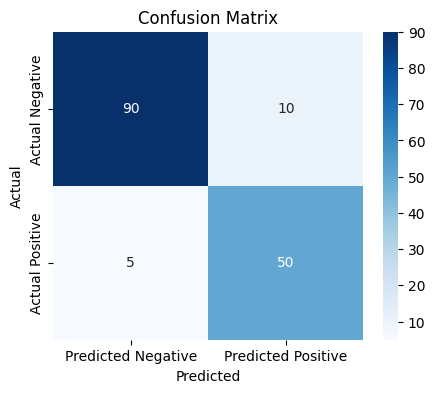

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix(metrics):
    """
    Plots a confusion matrix given the metrics (TP, FP, TN, FN).
    Parameters:
        metrics (dict): A dictionary containing the following keys:
                        - 'TP': True Positives
                        - 'FP': False Positives
                        - 'TN': True Negatives
                        - 'FN': False Negatives
    """
    # Create the confusion matrix as a 2x2 numpy array
    conf_matrix = np.array([
        [metrics.get("TN", 0), metrics.get("FP", 0)],
        [metrics.get("FN", 0), metrics.get("TP", 0)]
    ])

    plt.figure(figsize=(5, 4))  # Set the figure size
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive']
    )

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.grid(False)
    plt.show()

# Example
metrics = {
    'TP': 50,
    'FP': 10,
    'TN': 90,
    'FN': 5
}

confusion_matrix(metrics)


# Dataset (15 pt)

We are using the Pima Indians diabetes dataset. The objective with this dataset is to create a binary classification model that predicts whether or not an individual has diabetes based on several medical indicators. The target variable is given as Outcome and takes on a value of 1 if the patient has diabetes and 0 otherwise. This is an imbalanced class problem because there are significantly more patients without diabetes than with diabetes.




In [95]:
# run this code to Read in the dataset and display the first 5 lines of the dataframe
data = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/eecs-491/master/assign/project/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Impute Missing Values
There are several columns in the dataset that contain 0 values, which are not physically possible (e.g., Glucose, BloodPressure, etc.).
To correct these values, we can impute the zeros with the median of the column.
first



#### **Theoretical question1:** based on above explanation which of the columns that need to be imputed? (hint: there are 5 columns to impute).
answer:


In [96]:
# Impute Missing Values
# Replace 0s with the median of the respective column
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].replace(0, None).median())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].replace(0, None).median())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].replace(0, None).median())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].replace(0, None).median())
data['BMI'] = data['BMI'].replace(0, data['BMI'].replace(0, None).median())
# Display updated dataset
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


now check if there are missing values

In [97]:
# Check if there are missing (NaN) values in columns
missing = data.isna().any()
missing


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


## Normalize data
Machine learning algorithms like logistic regression can be affected by the scale of the input features. If one feature has values ranging from 0 to 1 and another has values from 0 to 1000, the algorithm might treat the feature with the larger range as more important, even if it’s not. This can lead to incorrect or poor results. Normalizing the features ensures that all features are treated equally by the algorithm.



#### **Theoretical question 2:** give 2 more reasons of why should we normalize the data before running an ML algorithm on the data.
answer:
1. Faster and More Stable Convergence (for Gradient-Based Algorithms):
Algorithms like Logistic Regression, SVM, and Neural Networks use gradient descent to optimize their weights. If features are not on a similar scale, the cost function becomes skewed, causing the algorithm to converge slowly or get stuck in local minima. Normalization helps the model converge faster and more reliably.

2. Improved Model Performance and Accuracy:
Some distance-based algorithms such as K-Nearest Neighbors (KNN) and K-Means Clustering rely heavily on calculating distances (e.g., Euclidean). If one feature has a larger scale, it can dominate the distance computation. Normalizing ensures that each feature contributes equally to the distance metric, leading to better performance.

In [98]:
def normalize_data(X: pd.DataFrame):
    """Normalize features (columns) to have zero mean and unit variance"""
    X = np.array(X)  # Convert DataFrame to numpy array
    mean = X.mean(axis=0)  # Column-wise mean
    std = X.std(axis=0)    # Column-wise standard deviation
    std[std == 0] = 1
    result = (X - mean) / std  # Normalize each feature
    return result


In [99]:
# Extract the features (X) and the labels (target or y)
features = data.drop(columns='Outcome')
labels = data.Outcome

Pima_X = normalize_data(features)
Pima_y = labels

## Training and Testing Sets
We will be using 200 randomly selected observations for the test set. This leaves 568 observations in the training data from which we will fit our model.

you can use the train_test_split method from sklearn library.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(Pima_X, Pima_y, test_size=200, random_state=7)

print(type(X_train))
print(X_train.shape)
print(X_test.shape)

<class 'numpy.ndarray'>
(568, 8)
(200, 8)


## another dataset

The **Breast Cancer Wisconsin (Diagnostic) Dataset** from `sklearn.datasets` is a widely used dataset for binary classification tasks. It contains **569 samples** of breast cancer cases, each described by **30 numerical features** computed from digitized images of fine needle aspirate (FNA) of breast masses. The features include the mean, standard error, and worst (largest) values of 10 cell nucleus characteristics (e.g., radius, texture, perimeter, smoothness). The target variable indicates whether the tumor is **malignant (1) or benign (0)**, with **357 benign and 212 malignant** samples. This dataset is useful for training machine learning models in medical diagnosis.


In [101]:
data = load_breast_cancer()
print(list(data))
Cancer_X, Cancer_y = data.data, data.target

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


we need to get familiar with the dataset we are using in order to find the best model to fit on this dataset.



In [102]:
# TODO: use DESCR attribute of the dataset to learn more about the dataset
description = data.DESCR
print(description)
print("____________________________________________")
description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

# Logistic Regression: Theory and Implementation (35 pt)

## 1. Introduction to Logistic Regression
**Logistic Regression** is a fundamental machine learning algorithm used for **binary classification** problems. Unlike **linear regression**, which predicts continuous values, logistic regression estimates the **probability** of an instance belonging to a particular class.

It is widely used in applications such as:
- Medical diagnosis (e.g., detecting cancerous vs. non-cancerous tumors)
- Spam detection (e.g., spam vs. non-spam emails)
- Credit scoring (e.g., loan approval or rejection)

---

## 2. Mathematical Formulation

### 2.1. Hypothesis Function (Sigmoid Function)
Logistic regression uses the **sigmoid function** (also known as the **logistic function**) to map real-valued inputs into a probability range \([0,1]\):

$$
h(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is the **linear combination** of input features and weights:

$$
z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = XW + b
$$

- $X$ is the input feature matrix
- $W$ is the weight vector (parameters)
- $b$ is the bias term

The output \( h(z) \) represents the probability that a given instance belongs to the **positive class (1)**.

### 2.2. Decision Boundary
We classify an instance using a **threshold** (e.g., 0.5):

$$
\hat{y} =
\begin{cases}
1, & \text{if } h(z) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$

---

## 3. Cost Function (Log Loss)
To train a logistic regression model, we optimize a **cost function** that measures how well the model fits the data. The **log loss (cross-entropy loss)** is defined as:

$$
J(W, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log h(z_i) + (1 - y_i) \log (1 - h(z_i)) \right]
$$

where:
-  $m$ is the number of training examples
-  $y_i$ is the actual label (\(0\) or \(1\))
-  $h(z_i)$ is the predicted probability

This function penalizes incorrect predictions:
- If $y = 1$ but $h(z)$ is small, the loss is high.
- If $y = 0$ but $h(z)$ is close to 1, the loss is high.

---

## 4. Regularization (L2 Regularization)
To prevent **overfitting**, we use **L2 regularization** (also called **Ridge Regularization**). This adds a penalty term to the cost function:

$$
J(W, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log h(z_i) + (1 - y_i) \log (1 - h(z_i)) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} W_j^2
$$

where:
- $\lambda$ controls the strength of regularization.
- Larger $\lambda$ values reduce overfitting but may increase bias.

---

## 5. Gradient Descent for Parameter Optimization
We minimize the cost function using **gradient descent**:

$$
W_j := W_j - \alpha \frac{\partial J}{\partial W_j}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where $\alpha$  is the **learning rate** and the gradients are:

$$
\frac{\partial J}{\partial W} = \frac{1}{m} X^T (h - y) + \frac{\lambda}{m} W
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i)
$$



In [104]:
import math

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_  # L2 regularization strength
        self.weights = None  # learnable weights
        self.bias = None  # learnable bias
        self.loss_history = []
        self.classes_ = ['0', '1']

    def _sigmoid(self, z):
        # TODO: Clip values to avoid overflow in exp. you can use np.clip()
        z = np.clip(z, -500, 500)  # clip z to range (-500, 500)
        sigmoid = 1/(1 + np.exp(-z)) # calculate the f(z) where f is the sigmoid function
        return sigmoid

    def _compute_loss(self, y, h):
        """
        Compute the logistic loss with L2 regularization.
        """
        epsilon = 1e-10  # Small value to avoid log(0)

        # TODO: Clip the predicted values (h) to be within [epsilon, 1 - epsilon]
        h = np.clip(h, epsilon, 1-epsilon)

        m = len(y)

        # TODO: Compute the logistic loss function
        loss = -np.sum(y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))

        # TODO: Compute L2 regularization term using self.lambda_ and self.weights
        regularization = (self.lambda_ / (2 * m)) * np.sum(np.square(self.weights))

        return loss + regularization

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            h = self._sigmoid(linear_model)

            loss = self._compute_loss(y, h)
            self.loss_history.append(loss)

            # TODO: Compute gradients for weights (dw) and bias (db)

            # Hint: Compute the gradient for weights (dw) using the formula from Section 5.
            # Don't forget to include the L2 regularization term.
            dw = (1/n_samples) * np.dot(X.T, (h - y)) + (self.lambda_/n_samples) * self.weights

            # Hint: Compute the gradient for bias (db) using the formula from Section 5.
            db = (1/n_samples) * np.sum(h - y)

            # TODO: Update the weights and bias using the learning rate
            self.weights -= self.lr * dw  # Update weights
            self.bias -= self.lr * db  # Update bias

        return self


    def predict_proba(self, X):
        # Compute the probability of the positive class: use affine mappaing learned.
        linear_model = np.dot(self.weights, X.T) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, y_true, threshold=0.5):
        proba = self.predict_proba(X)

        if len(self.classes_) == 2:
            y_pred = (proba >= threshold).astype(int)
        else:
            y_pred = np.argmax(proba, axis=1)


        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))
        # Compute True Positives, False Positives, True Negatives, and False Negatives
        result = {
            'TP': int(TP),
            'TN': int(TN),
            'FP': int(FP),
            'FN': int(FN)
        }

        return result

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)



run .fit() function to fit the model on both datasets seperately. at first you should split each dataset into training and test sets and then pass and infer the trained model.

Accuracy: 0.77
Precision: 0.7213114754098361
Recall: 0.6027397260273972
F1 Score: 0.6567164179104478


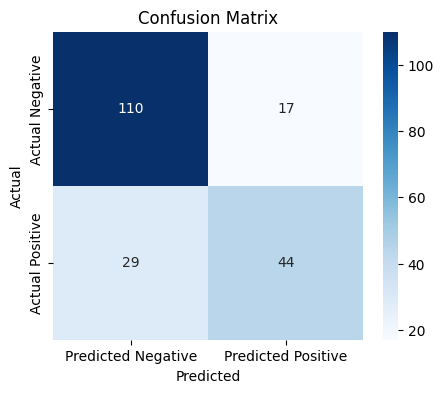

In [105]:
X = Pima_X
y = Pima_y
# TODO: Split into train and test sets
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X, y, test_size=200, random_state=7)

# TODO: Initialize and train LogisticRegression
lr_pima = LogisticRegression(learning_rate=0.01, n_iters=10000, lambda_=0.1)
lr_pima.fit(X_train, y_train)

# TODO: use .predict() function of LogisticRegression class for inference.
results = lr_pima.predict(X_test_pima, y_test_pima)

# Calculate metrics
print("Accuracy:", accuracy(results))
print("Precision:", precision(results))
print("Recall:", recall(results))
print("F1 Score:", f1_score(results))
confusion_matrix(results)

Accuracy: 0.77
Precision: 0.7213114754098361
Recall: 0.6027397260273972
F1 Score: 0.6567164179104478


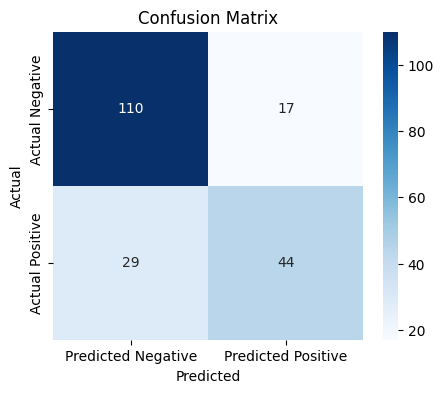

In [107]:
# TODO: Load dataset
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target

# TODO: Split into train and test sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=7)

# TODO: Initialize and train LogisticRegressionCV
lr_bc = LogisticRegression(learning_rate=0.1, n_iters=1000, lambda_=0.01)
lr_bc.fit(X_train_bc, y_train_bc)

# TODO: use .predict() function of LogisticRegression class for inference.
reset_defaults = lr_bc.predict(X_test_bc, y_test_bc)

# Calculate metrics
print("Accuracy:", accuracy(results))
print("Precision:", precision(results))
print("Recall:", recall(results))
print("F1 Score:", f1_score(results))

confusion_matrix(results)

## AUC



In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def calc_roc(probs, y_test):
    # Calculate the area under the ROC curve
    auc = roc_auc_score(y_test, probs)

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, probs)

    # Plot the ROC curve
    plt.style.use('bmh')
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, 'b', label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'r--')  # Random guess line
    plt.xlabel('False Positive Rate', size=16)
    plt.ylabel('True Positive Rate', size=16)
    plt.title('Receiver Operating Characteristic Curve', size=18)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


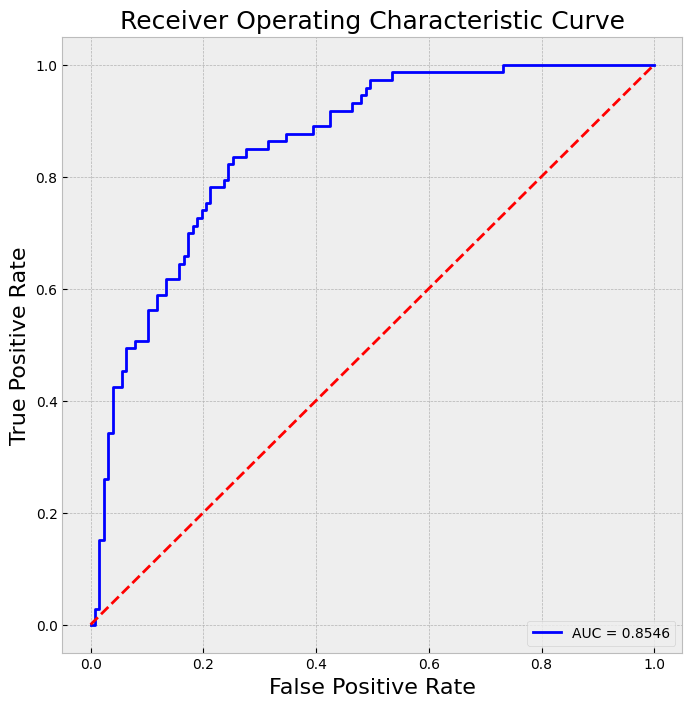

In [119]:
lr_pred_proba = lr_pima.predict_proba(X_test_pima)
calc_roc(lr_pred_proba, y_test_pima)

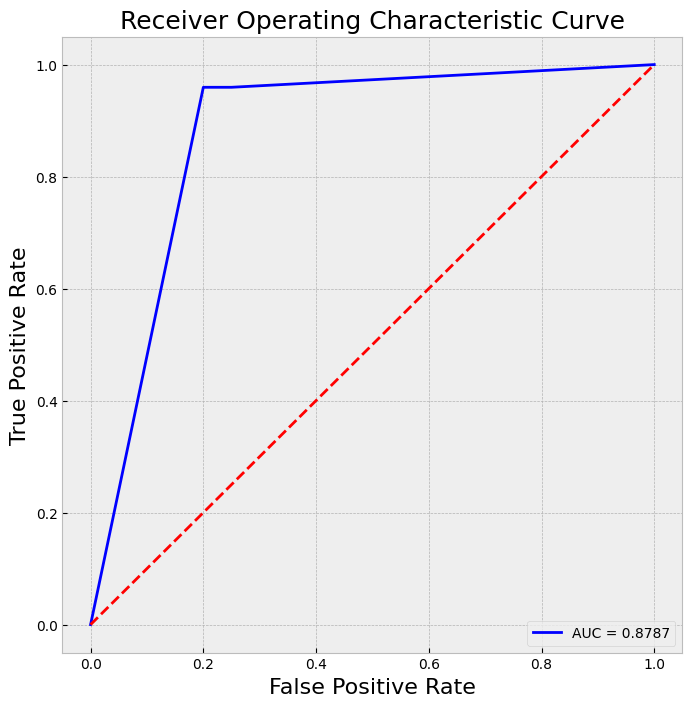

In [120]:
lr_pred_proba = lr_bc.predict_proba(X_test_bc)
calc_roc(lr_pred_proba, y_test_bc)

# Bayesian Classifier: Theory and Implementation (35 pt)

## 1. Introduction to Bayesian Classifier
The Bayesian Classifier is based on **Bayes' Theorem**, which provides a way to calculate the probability of a class given some observed data. This method is highly effective for classification problems, especially when the features are conditionally independent given the class. It assumes that the data follows a **Gaussian (normal) distribution** within each class.

### Bayes' Theorem
Bayes' Theorem is given by:

$$
P(C_k | X) = \frac{P(X | C_k)P(C_k)}{P(X)}
$$

where:
- $P(C_k | X)$ is the posterior probability of class $C_k$ given the feature vector $X$.
- $P(X | C_k)$ is the likelihood, which is the probability of the feature vector $X$ given class $C_k$.
- $P(C_k)$ is the prior probability of class $C_k$.
- $P(X)$ is the evidence, or the total probability of the feature vector across all classes.

In the Bayesian Classifier, we need to calculate the likelihood of the feature vector for each class and multiply it by the prior probability of that class.

### Gaussian Assumption
The likelihood $P(X | C_k)$ is assumed to follow a **Gaussian (Normal) distribution**. This means for each feature $x_i$ in the feature vector $X$, we assume:

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

where:
- $\mu$ is the mean of feature $x_i$ for class $C_k$,
- $\sigma^2$ is the variance of feature $x_i$ for class $C_k$.

### Prior Probability
The **prior probability** $P(C_k)$ is simply the fraction of samples that belong to class $C_k$. It can be computed as:

$$
P(C_k) = \frac{\text{Number of samples in class } C_k}{\text{Total number of samples}}
$$

## 2. Implementation Overview

In the **`__init__`** method, we initialize parameters for the class:

- **`var_smoothing`**: A small value added to variances to prevent division by zero or extremely small numbers, which can cause instability.
- **`classes_`**: The list of unique classes in the target variable.
- **`priors_`**: The prior probabilities for each class.
- **`means_`**: The means of each feature for each class.
- **`variances_`**: The variances of each feature for each class.



In [121]:
import numpy as np

class BayesianClassifier:
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing  # Prevents zero variances
        self.classes_ = None
        self.priors_ = None
        self.means_ = None
        self.variances_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)  # Unique class labels
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        # Initialize arrays
        self.means_ = np.zeros((n_classes, n_features))
        self.variances_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]  # Filter data for class c
            self.means_[idx, :] = np.mean(X_c, axis=0)
            self.variances_[idx, :] = np.var(X_c, axis=0) + self.var_smoothing  # Add smoothing
            self.priors_[idx] = X_c.shape[0] / X.shape[0]

        return self

    def _calculate_log_proba(self, X):
        log_prob = []
        for idx in range(len(self.classes_)):
            prior = np.log(self.priors_[idx])
            mean = self.means_[idx]
            variance = self.variances_[idx]

            # Gaussian log-likelihood
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * variance))
            log_likelihood -= 0.5 * np.sum(((X - mean) ** 2) / variance, axis=1)

            total_log_prob = prior + log_likelihood
            log_prob.append(total_log_prob)

        return np.vstack(log_prob).T  # Shape: (n_samples, n_classes)

    def predict_proba(self, X):
        log_prob = self._calculate_log_proba(X)
        max_log_prob = np.max(log_prob, axis=1, keepdims=True)  # For numerical stability
        prob = np.exp(log_prob - max_log_prob)
        prob /= np.sum(prob, axis=1, keepdims=True)
        return prob

    def predict(self, X, y_true=None, threshold=0.5):
        proba = self.predict_proba(X)

        if len(self.classes_) == 2:  # Binary classification
            y_pred = (proba[:, 1] >= threshold).astype(int)
        else:  # Multiclass
            y_pred = np.argmax(proba, axis=1)

        if y_true is None:
            return y_pred

        # Confusion matrix components
        results = {}
        results['TP'] = np.sum((y_pred == 1) & (y_true == 1))
        results['FP'] = np.sum((y_pred == 1) & (y_true == 0))
        results['TN'] = np.sum((y_pred == 0) & (y_true == 0))
        results['FN'] = np.sum((y_pred == 0) & (y_true == 1))

        return results

    def score(self, X, y):
        results = self.predict(X, y)
        return accuracy(results)

def accuracy(results):
    TP = results.get('TP', 0)
    TN = results.get('TN', 0)
    FP = results.get('FP', 0)
    FN = results.get('FN', 0)
    return (TP + TN) / (TP + TN + FP + FN)


Accuracy: 0.74
Precision: 0.6438356164383562
Recall: 0.6438356164383562
F1 Score: 0.6438356164383562


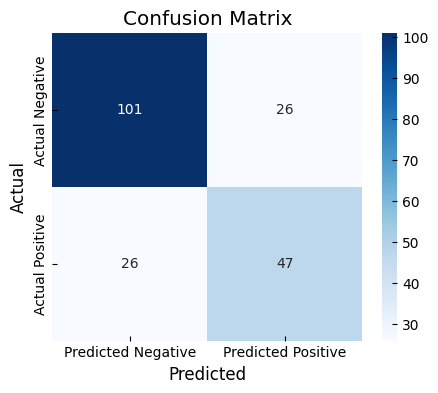

In [122]:
# Initialize and train BayesianClassifier
bc_pima = BayesianClassifier()
bc_pima.fit(X_train_pima, y_train_pima)

# Use .predict() for inference
results = bc_pima.predict(X_test_pima, y_test_pima)

# Metrics
print("Accuracy:", accuracy(results))
print("Precision:", precision(results))
print("Recall:", recall(results))
print("F1 Score:", f1_score(results))
confusion_matrix(results)


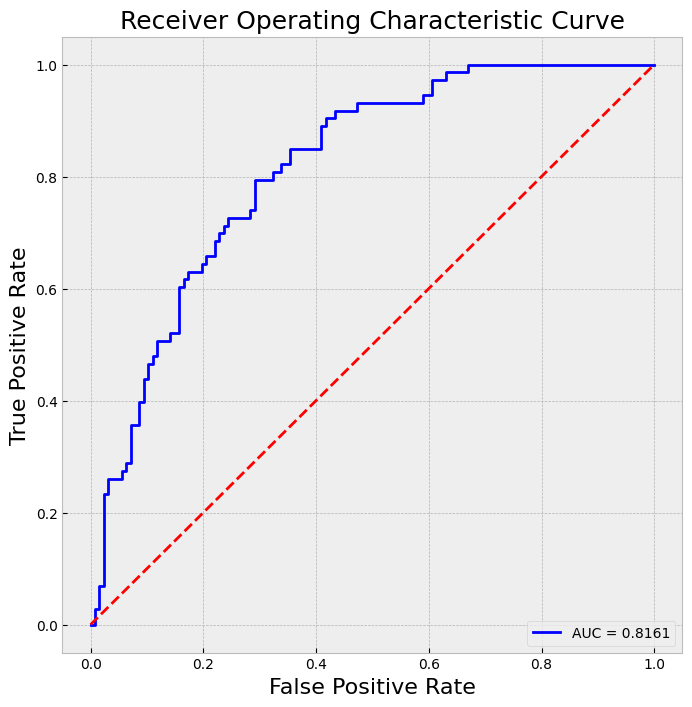

In [123]:
lr_pred_proba = bc_pima.predict_proba(X_test_pima)
calc_roc(lr_pred_proba[:,1], y_test_pima)

Accuracy: 0.9473684210526315
Precision: 0.9473684210526315
Recall: 0.972972972972973
F1 Score: 0.9599999999999999


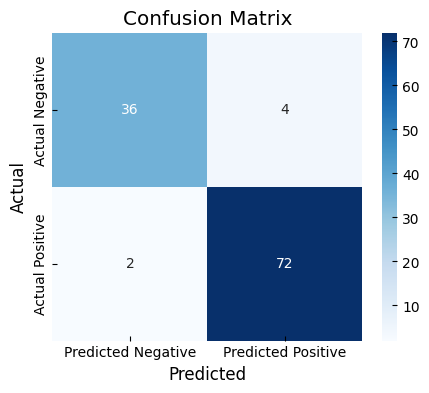

In [124]:
# Initialize and train BayesianClassifier
bayes_bc = BayesianClassifier()
bayes_bc.fit(X_train_bc, y_train_bc)

# Use .predict() method for inference
results = bayes_bc.predict(X_test_bc, y_test_bc)

# Calculate and display metrics
print("Accuracy:", accuracy(results))
print("Precision:", precision(results))
print("Recall:", recall(results))
print("F1 Score:", f1_score(results))
confusion_matrix(results)


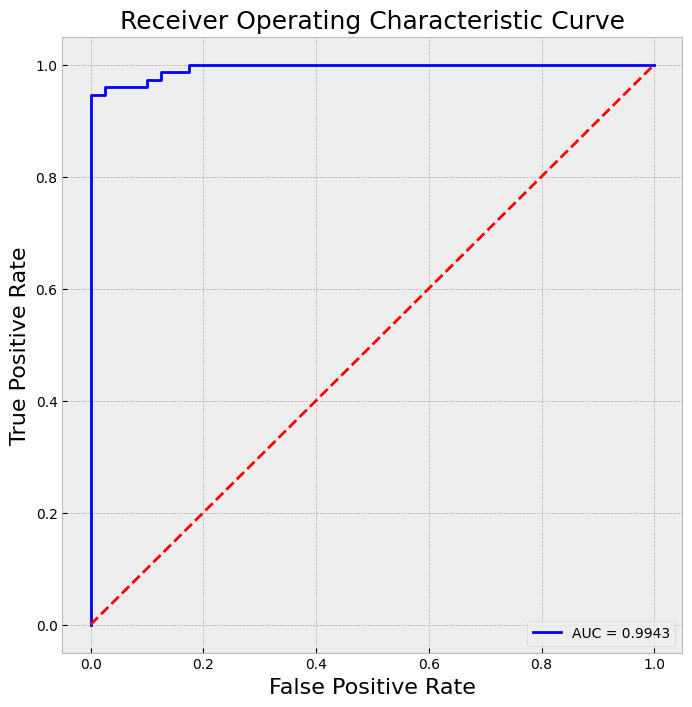

In [125]:
bc_pred_proba = bayes_bc.predict_proba(X_test_bc)
calc_roc(bc_pred_proba[:, 1], y_test_bc)